# Lab 1: Sampling and coding basics

This lab aims to get familiar with the basics of audio sampling and of coding audio signals, listening to its effect.

Make sure you understand all the code given and its signal processing task before answering the questions. Use headphones to listen to the sounds when doing the different exercises.

To do the labs best is to use Visual Studio Code, cloning this repository, `git clone https://github.com/xserra/audio-coding-materials.git`, and installing the material as described in the README file of the repository. You should submit the python notebook through the Aula Global. The notebooks should be selfcontained.

## Relevant concepts:

### Spectrum
The magnitude spectrum of a sound fragment describes the magnitudes of its sinusoidal components as a function of frequency.

### Spectrogram
The magnitude spectrogram of a sound is a visual way to represent a sequence of magnitude spectra computed over a whole sound, thus showing the time-varying nature of a sound.

### Sampling Rate
Number of samples of a signal taken every second. It defines the frequency range obtained.

### Bit depth
Number of bits used to represent every sample of a signal. It defines the dynamic range obtained.

### Resampling
Changing the sampling rate of a signal. It is first important to filter out the frequencies that cannot be represented in the new sampling rate.

### Quantization
Changing the number of bits used to represent every sample of a signal.

### MP3
Formally MPEG-1 Audio Layer III is a coding format for digital audio commonly used on internet applications.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft
import IPython.display as ipd
from scipy.io.wavfile import read
!pip install pydub
from pydub import AudioSegment

In [3]:
# functions used in the whole lab
def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  # read sound file
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  return sound_array, sampling_rate

def display_sound(sound_array, sampling_rate=44100):
  """ Display signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      sampling_rate (int): Sampling rate
  """
  # plot the waveform of the sound
  plt.figure(0, figsize=(10, 3))
  time_indexes = np.arange(0, sound_array.size/sampling_rate, 1.0/sampling_rate)
  plt.plot(time_indexes, sound_array)
  plt.xlabel('time (seconds)')
  plt.ylabel('amplitude')
  plt.show()
  # play the sound
  ipd.display(ipd.Audio(data=sound_array, rate=sampling_rate))

def display_spectrum(sound_array, sampling_rate=44100):
  """ Display magnitude spectrum of signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      sampling_rate (int): Sampling rate
  """
  # compute the hanning window
  window = signal.get_window('hann', sound_array.size)
  # compute the spectrum of the windowed input signal
  spectrum = fft(window*sound_array)
  # compute the magnitude spectrum in dB
  magnitude_spectrum = 20*np.log10(abs(spectrum[:spectrum.size//2]))

  frequency_indexes = np.arange(0, sampling_rate / 2, sampling_rate / spectrum.size)

  # find the index of the highest amplitude
  max_index = np.argmax(magnitude_spectrum)
  max_frequency = frequency_indexes[max_index]

  # plot the magnitude spectrum
  plt.figure(0, figsize=(10, 5))
  frequency_indexes = np.arange(0, sampling_rate/2, sampling_rate/spectrum.size)
  plt.plot(frequency_indexes, magnitude_spectrum)
  plt.axvline(max_frequency, color='r', linestyle='--', label=f"Fundamental Frequency: {max_frequency:.2f} Hz")
  plt.xlabel('frequency (Hz)')
  plt.ylabel('amplitude (dB)')
  plt.show()

  return max_frequency

def display_spectrogram(sound_array, hop_size=256, fft_size=512, sampling_rate=44100):
  """ Display magnitude spectrogram of signal sound_array
    Args:
      sound_array (numpy.array): Array of samples
      hop_size (int): window hop size
      fft_size (int): Spectrogram fft size
      sampling_rate (int): Sampling rate of sound
  """
  # compute the hanning window
  window = signal.get_window('hann', fft_size)
  # initialize the output spectrogram
  magnitude_spectrogram = []
  sample_index = 0
  # iterate over the input sound computing a sequence of spectra
  while sample_index < sound_array.size-fft_size:
    spectrum = fft(window*sound_array[sample_index:sample_index+fft_size])
    magnitude_spectrum = 20*np.log10(abs(spectrum[:spectrum.size//2]))
    magnitude_spectrogram.append(magnitude_spectrum)
    sample_index += hop_size

  # plot the magnitude spectrogram
  plt.figure(figsize=(10, 5))
  time_indexes = np.arange(0, sample_index/sampling_rate, hop_size/sampling_rate)
  frequency_indexes = np.arange(0, sampling_rate/2, sampling_rate/fft_size)
  plt.pcolormesh(time_indexes, frequency_indexes, np.transpose(magnitude_spectrogram), shading='nearest', cmap='inferno')
  plt.colorbar(format='%+2.0f dB')
  plt.xlabel('time (seconds)')
  plt.ylabel('frequency (Hz)')
  plt.show()

## Part 1- Reading and plotting an audio file

Read and plot an audio file from the 'sounds' directory, 'synthetic.wav'. Listen to the sound and plot its waveform, plot a magnitude spectrum of a sound fragment, and the magnitude spectrogram of the whole sound. For both the spectrum and the spectrogram try different values of the `fft_size`: 256, 1024, and 2048. Answer the questions given and modify the code to support your answers.

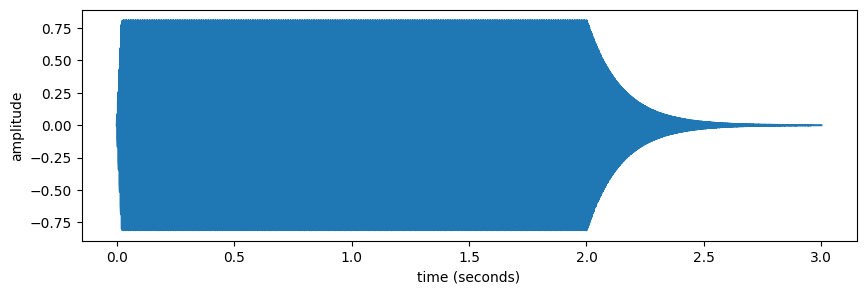

In [4]:
# read and display a sound
sound_array, sampling_rate = read_sound('/content/drive/MyDrive/UNI/UPF/5è CURS/1r TRIM/SISTEMES DE CODIFICACIÓ ÀUDIO I VÍDEO/audio-coding-materials-main/audio-coding-materials-main/sounds/synthetic.wav')
display_sound(sound_array, sampling_rate)

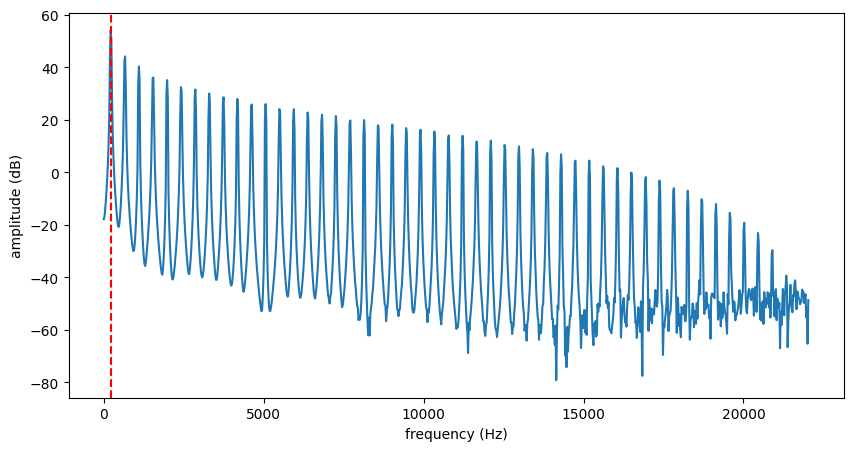

Freqüència fonamental: 215.33 Hz


In [5]:
# display spectrum of a stable fragment of sound_array, try different values for fft_size, all being a power of 2
# ex: 256, 1024, 2048
fft_size = 2048
sample_offset = int(1.0 * sampling_rate) # choose the starting sample at 1 second

#calcular freqüència fonamental
fundamental_frequency = display_spectrum(sound_array[sample_offset:sample_offset + fft_size], sampling_rate)
print(f'Freqüència fonamental: {fundamental_frequency:.2f} Hz')

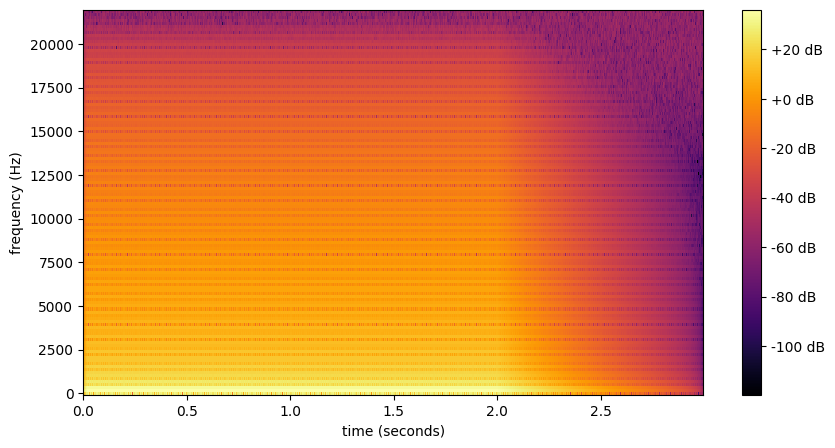

In [6]:
# display spectrogram of x, try different values for fft_size, all being a power of 2
# ex: 256, 1024, 2048
hop_size = 128
fft_size = 256
display_spectrogram(sound_array, hop_size, fft_size, sampling_rate)

**Questions: (answer them in this text cell)**

**1. Explain the effect of the different fft_size values in the spectrum and spectrogram displays of the `synthetic.wav` sound. Example values to try: 256, 1024, 2048. Modify the code above as necessary and refer to it and to the resulting plots to support the explanation.**

L'espectre d'un so és una representació de l'amplitud de les diferents freqüències que el composen en un interval de temps, que comença en 1 segon en aquest cas, i abarca una quantitat de mostres, definida per el fft_size (nombre de mostres analitzades al calcular la FFT).

Al usar un fft_size petit (com 256), s'analitzen menys mostres del senyal, llavors tenim menys dades per a cada freqüència, de manera que no hi ha tantes diferències en amplitud entre les freqüències (les freqüències properes s'agrupen més), resultant en un espectre més suau o uniforme, amb molta menys variació de l'amplitud.

En canvi, un fft_size gran (com 2048) analitza més mostres del senyal i permet distingir millor entre les freqüències, mostrant molta més variació o pics d'amplitud més grans i definits. Tot i que un fft_size massa gran, com 4096 o més, pot resultar en un gràfic més complex i difícil d'interpretar, ja que pot mostrar molts detalls que poden no ser rellevants per a l'anàlisi general del so.

L'espectrograma d'un so és una representació visual que mostra com varien les freqüències d'un senyal al llarg del temps.

En utilitzar valors baixos de fft_size, s'obté una millor resolució temporal, capturant variacions ràpides en el so, però amb menys resolució de freqüència, i això pot ocultar detalls i fer que l'espectrograma sigui més uniforme. En canvi, valors alts de fft_size proporcionen una millor resolució de freqüència, permetent distingir components tonals properes amb pics més definits. No obstant això, pot ser que els canvis ràpids en el so no es capturin adequadament, donant un espectrograma més "suau" i menys detallat en el temps.

**2. What is the fundamental frequency, in Hz, of the `synthetic.wav` sound?. Explain how you identifyied it. Modify or add any code and plots above to support your answer.**

La freqüència fonamental d'un so és la més baixa i la que percebem com la nota principal. En un espectre, sol ser el pic més alt de l'amplitud, ja que és la freqüència que vibra de manera més eficient i produeix el so més fort. He modificat la funció 'display_spectrum' per calcular la freqüència amb més amplitud i mostrar-la en l'espectre. El pic més alt d'amplitud el trobem a la freqüència de 215.33 Hz.

## Part 2 - Resample sound

Resample (decimate) and change the bits per sample (quantize) a sound signal by different amounts and compare the results. Find the highest compression that still keeps the perceptual qualities of the original sound. Answer the questions given and modify the code as needed.

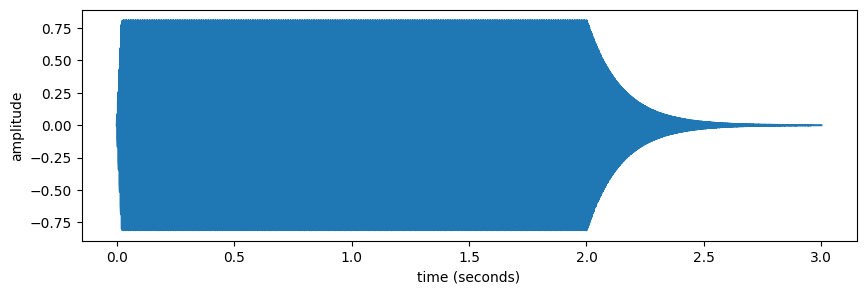

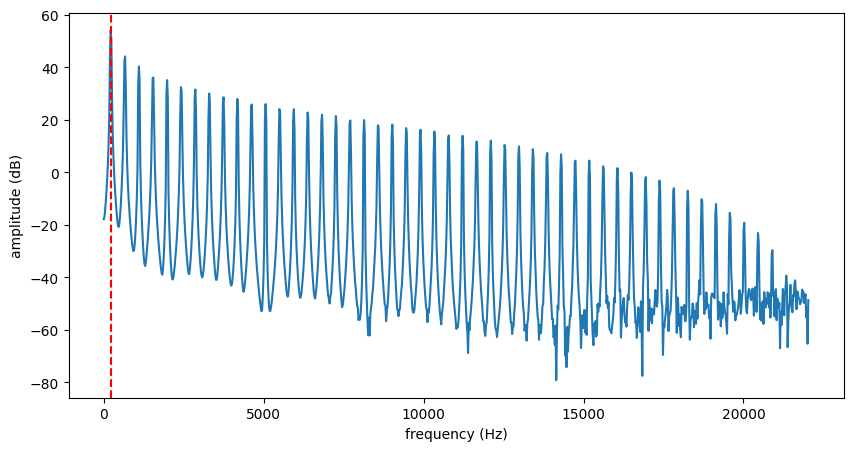

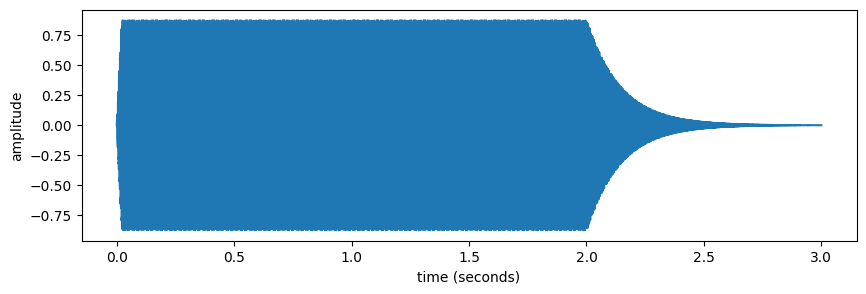

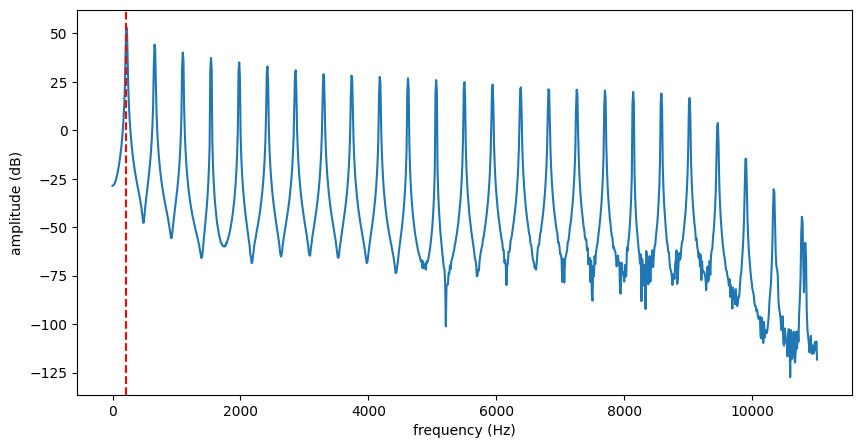

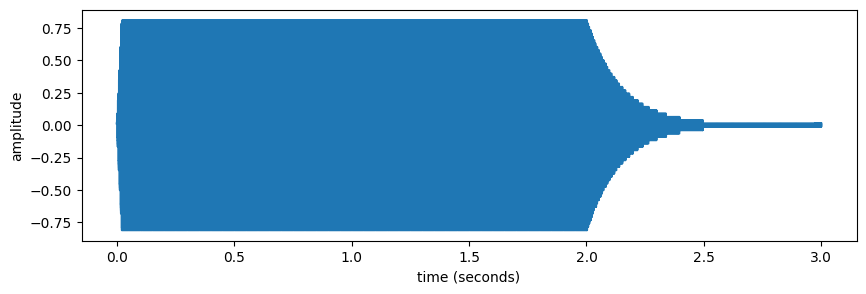

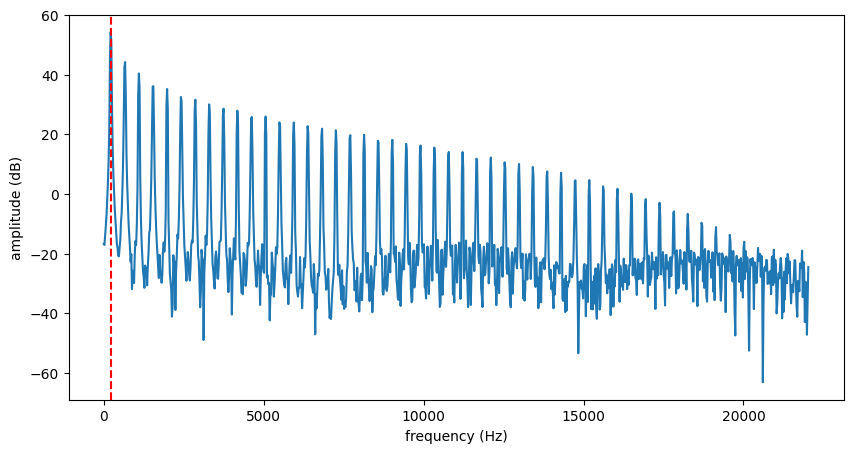

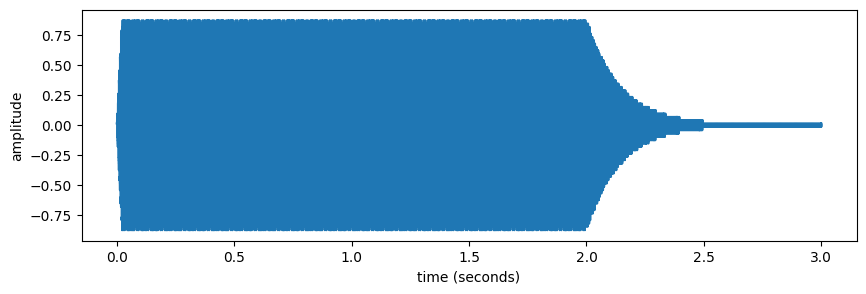

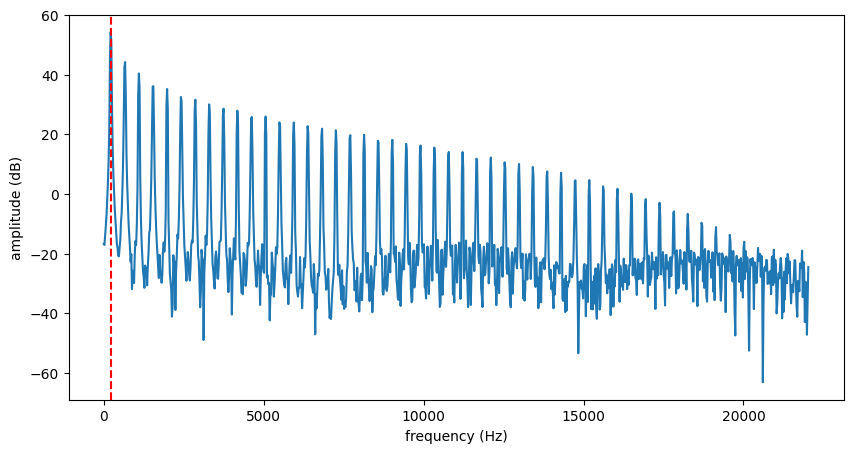

215.33203125

In [25]:
def quantize_signal(x, original_bits, target_bits):
  """Quantizes a signal x, assuming it originally had original_bits bits per sample, to target_bits per sample.
  Args:
    x (numpy.array): Array of samples as floating point values between -1 and 1
    original_bits (int): Number of bits of the signal that x represents
    target_bits (int): Number of bits per sample of the output signal
  """
  # Scaling the signal to the range of [0, 2^target_bits - 1]
  x_scaled = (x - np.min(x)) / (np.max(x) - np.min(x)) * (2**target_bits - 1)
  # Quantize by rounding
  x_quantized = np.round(x_scaled)
  # Re-scaling back to the original amplitude range
  x_output = (x_quantized / (2**target_bits - 1)) * (np.max(x) - np.min(x)) + np.min(x)
  return x_output

fft_size = 2048
sample_offset = int(1.0 * sampling_rate) # choose the starting sample at 1 second

display_sound(sound_array, sampling_rate)
display_spectrum(sound_array[sample_offset:sample_offset + fft_size], sampling_rate)

# 1. change the decimate_factor (dowmnsample the sound) and find the lowest sampling rate for which you do not hear a difference

decimate_factor = 2
decimated_sound_array = signal.decimate(sound_array, decimate_factor)
sample_offset_decimated = int(sample_offset / decimate_factor)
display_sound(decimated_sound_array, sampling_rate / decimate_factor)
display_spectrum(decimated_sound_array[sample_offset_decimated:sample_offset_decimated + fft_size], sampling_rate / decimate_factor)

# 2. change the number_of_bits of the samples and find the lowest number for which you do not hear a difference

number_of_bits = 6
quantized_sound_array_8 = quantize_signal(sound_array, 16, number_of_bits)
display_sound(quantized_sound_array_8, sampling_rate)
display_spectrum(quantized_sound_array_8[sample_offset:sample_offset + fft_size], sampling_rate)

# 3. change the decimate_factor (dowmnsample the sound) and the number_of_bits (quantize)
# to find the most compressed signal for which you do not hear a difference
number_of_bits = 6
decimate_factor = 2
decimated_and_quantized_sound_array= quantize_signal(signal.decimate(sound_array, decimate_factor), 16, number_of_bits)
display_sound(decimated_and_quantized_sound_array, sampling_rate/decimate_factor)
display_spectrum(quantized_sound_array_8[sample_offset:sample_offset + fft_size], sampling_rate)


**Questions: (answer in this text cell)**

1. **Modify the decimation factor applied to the `synthetic.wav`. What is the biggest decimation for which you do not hear a difference? Change the demination factor in the code and explain the result supporting your answer with any needed plot. Use both the waveform and the spectrum.**

  El factor de decimació més gran per al qual no he sentit gairebé cap diferència és 2, ja que amb 3 ja s'escoltava molt diferent el so. Això vol dir que podem reduir el nombre de mostres que es prenen per segon com a màxim a la meitat.

  Tot i que si mirem la forma d'ona i l'espectre, veiem que amb un factor de decimació 2 ja varien respecte l'original, però com el factor ha de ser un enter, ja no podem trobar-ne un més baix.

2. **Modify the quantization applied to the `synthetic.wav`. What is the biggest quantization for which you do not hear a difference?. Change the number of bits in the code and explain your answer supporting it with any needed plot.**

  La quantització més gran que es pot fer de l'àudio sense notar cap diferència amb l'original és reduir el nombre de bits de 16 a 6, per tant el mínim nombre de bits serà 6. Amb 6 bits podem veure que la forma d'ona i l'espectre ja canvien respecte a l'original, però no he notat cap diferència amb el so. Amb 5 bits ja es notava la diferència al comparar el so amb l'original.

3. **Compress the sound `synthetic.wav` by applying both decimation and quantization. What it the highest compression factor you get without losing the perceptual quality of the original sound when performing both a decimation and a quantization?. Explain your answer supporting it with any needed plot.**

  Si deixem el nombre de bits de la quantització a 6 bits i apliquem la decimació, podem reduir tant la profunditat de bits com la freqüència de mostreig. En aquest cas, el factor de decimació més gran per al qual no he sentit gairebé cap diferència respecte a l'original és 2. Això significa que hem reduït la taxa de mostreig a la meitat, mantenint encara la qualitat perceptual del so gairebé intacta.

## Part 3 - Apply audio coding
Compress an audio signal with mp3, using different bit rates to control the compression. Find the lowest bit rate for which you do not hear a difference. Change the code as needed and answer the questions given.

wav file size: 264644 bytes
mp3 file size: 73395 bytes


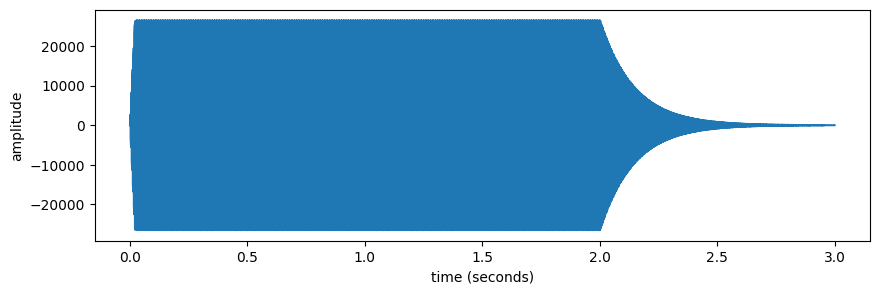

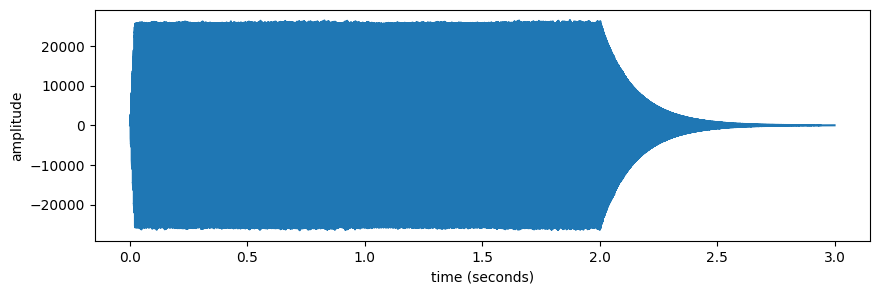

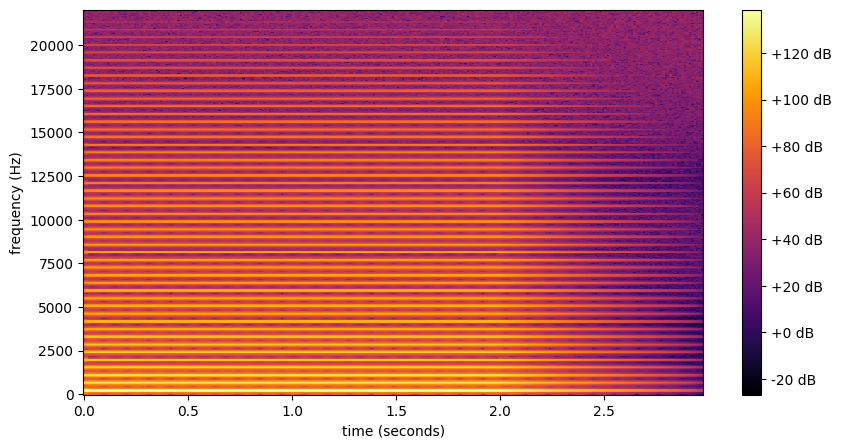

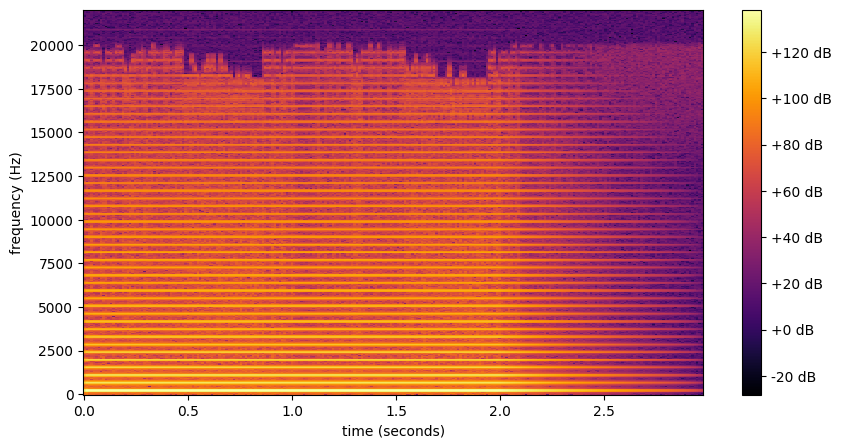

In [36]:
# read the audio file using AudioSegment
audio1 = AudioSegment.from_wav('/content/drive/MyDrive/UNI/UPF/5è CURS/1r TRIM/SISTEMES DE CODIFICACIÓ ÀUDIO I VÍDEO/audio-coding-materials-main/audio-coding-materials-main/sounds/synthetic.wav')
wav_file_size = os.path.getsize('/content/drive/MyDrive/UNI/UPF/5è CURS/1r TRIM/SISTEMES DE CODIFICACIÓ ÀUDIO I VÍDEO/audio-coding-materials-main/audio-coding-materials-main/sounds/synthetic.wav')
print(f'wav file size: {wav_file_size} bytes')

# change the bit_rate used in the compression, try: 256kbits/s, 192kbits/s, 96kbits/s, 32kbits/s.
# find the lowest bitrate for which you do not hear a difference
bit_rate ="192k"

# compress the sound with mp3
audio1.export('synthetic.mp3', format="mp3", bitrate=bit_rate)

# read the compressed mp3 file
audio2 = AudioSegment.from_mp3('synthetic.mp3')
mp3_file_size = os.path.getsize('synthetic.mp3')
print(f'mp3 file size: {mp3_file_size} bytes')

# display the original and compressed sound
x = np.array(audio1.get_array_of_samples())
y = np.array(audio2.get_array_of_samples())
display_sound(x,audio1.frame_rate)
display_sound(y,audio2.frame_rate)
display_spectrogram(x, 512, 1024, audio1.frame_rate)
display_spectrogram(y, 512, 1024, audio2.frame_rate)

**Questions: (answer in this cell)**

1. **Apply mp3 compression to the `synthetic.wav`sound. Explain the perceptual effect of different bit rates in the mp3 coding, 256kbits/s, 192kbits/s, 96kbits/s, 32kbits/s. Use the spectrograms of the original and compressed sounds to suport your explanation. What is the lowest bit rate for which you do not hear a significant difference?**

  El bit rate més baix per al qual no he notat una diferència significativa és 192 kbits/s. A 256 kbits/s, la qualitat és molt alta i no es perceben canvis. Quan baixem a 96 kbits/s, es comencen a perdre alguns detalls en les freqüències altes, i el so sona menys clar. A 32 kbits/s, la qualitat es veu molt afectada, el so es distorsiona i perd molts detalls importants. Els espectrogrames mostren que a mesura que es redueix el bit rate, es van eliminant freqüències altes, especialment a 96 i 32 kbits/s, afectant la qualitat del so.

2. **Calculate the compression factor obtained by comparing the sizes of the original and the most compressed but good sounding compressed file. Also compute the compression factor by comparing the bit_rate of original sound with the bit_rate of this compresed sound. Any difference? If so, explain the reason.**

  El factor de compressió dividint les mides dels arxius original i el més comprimit és d'aproximadament 3,60. L'arxiu WAV original ocupa 264,644 bytes i l'arxiu MP3 comprimit 73,395 bytes. Si dividim els bitrates, el factor de compressió és de 3,68, amb un bitrate original de 705,717 bps i un bitrate MP3 de 192,000 bps. La diferència entre els factors de compressió es deu a l'eficiència de la compressió MP3, que elimina dades inaudibles per a l'oïda humana, mantenint així una qualitat acceptable amb una mida d'arxiu més petita.
----